**Project | Business Case: Automated Customer Reviews**

**Project Goal**
This project aims to develop a product review system powered by NLP models that aggregate customer feedback from different sources. The key tasks include classifying reviews, clustering product categories, and using generative AI to summarize reviews into recommendation articles.

Setup Environment

In [23]:
# Install dependencies
!pip install -q numpy pandas scikit-learn transformers datasets torch matplotlib joblib


Upload Dataset

In [24]:
import os
from pathlib import Path
from google.colab import files

# Define the base directory (e.g., current working directory)
base_dir = Path('./')

# Create the raw data directory if it doesn't exist
raw_data_dir = base_dir / "data/raw"
raw_data_dir.mkdir(parents=True, exist_ok=True)

uploaded = files.upload()  # choose 1429_1.csv.zip

# Move uploaded file to /data/raw
for name in uploaded.keys():
    os.replace(name, raw_data_dir / name)

Saving archive (1).zip to archive (1).zip


Unzip & Preview

In [25]:
import zipfile
import pandas as pd

raw_zip = raw_data_dir / list(uploaded.keys())[0]
extract_dir = base_dir / "data/raw/extracted"
extract_dir.mkdir(exist_ok=True)

with zipfile.ZipFile(raw_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Find first CSV file and preview
csv_files = list(extract_dir.glob("*.csv"))
df = pd.read_csv(csv_files[0], low_memory=False)


Analyze the Data

In [26]:
df.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [27]:
df.tail(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,http://reviews.bestbuy.com/3545/5620410/review...
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,http://reviews.bestbuy.com/3545/5620410/review...
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,http://reviews.bestbuy.com/3545/5620410/review...
28331,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,"At ninety dollars, the expectionations are low...",You get what your paying for,Hung,http://reviews.bestbuy.com/3545/5620410/review...


In [28]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [30]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


Check for Missing Values

In [31]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
reviews.didPurchase,28323
reviews.id,28291
reviews.doRecommend,12246
reviews.numHelpful,12217
reviews.username,5
id,0
dateUpdated,0
dateAdded,0
primaryCategories,0
categories,0


Maintain Only Necessary Columns

In [32]:
# MAINTAIN THE COLUMNS THAT WE WANT.
df_fewcolumns = df[['id', 'name', 'asins', 'brand', 'categories', 'reviews.doRecommend',
        'reviews.numHelpful', 'reviews.rating',
        'reviews.text', 'reviews.title', ]]


In [33]:
df_fewcolumns

,id,name,asins,brand,categories,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",NaN,NaN,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...
...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",True,0.0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift
28328,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",True,0.0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.
28329,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",True,0.0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!
28330,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",True,0.0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!


**Clustering Model**

Installaing Libraries

In [34]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD  # optional (LSA)
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns


Build the text field to cluster

In [35]:
def safe_concat_text(df, cols):
    s = pd.Series([""]*len(df), index=df.index)
    for c in cols:
        if c in df.columns:
            s = s + " " + df[c].fillna("").astype(str)
    return s.str.replace(r"\s+", " ", regex=True).str.strip()

# Using your columns
df_fewcolumns["cluster_text"] = safe_concat_text(
    df_fewcolumns, ["name","brand","categories","reviews.title"]
)
mask = df_fewcolumns["cluster_text"].str.len() > 0
df_clust = df_fewcolumns.loc[mask].copy()
print("Rows used for clustering:", len(df_clust))

Rows used for clustering: 28332


/tmp/ipython-input-485251932.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns["cluster_text"] = safe_concat_text(


TF-IDF (sparse) and optional SVD

In [36]:
tfidf = TfidfVectorizer(max_features=80000, ngram_range=(1,2), min_df=3)
X = tfidf.fit_transform(df_clust["cluster_text"])

# L2 normalize rows (keeps X sparse)
Xn = normalize(X, norm="l2", copy=False)

# Optional dimensionality reduction (helps speed/stability with big vocabs)
USE_SVD = True
if USE_SVD:
    svd = TruncatedSVD(n_components=200, random_state=42)  # 100–300 is typical
    Xr = svd.fit_transform(Xn)
else:
    Xr = Xn  # can be sparse if no SVD


Pick k by Silhouette (classical KMeans)

k=4 → silhouette=0.360
k=5 → silhouette=0.383
k=6 → silhouette=0.298
k=7 → silhouette=0.315

✅ Best k: 5 with silhouette=0.383


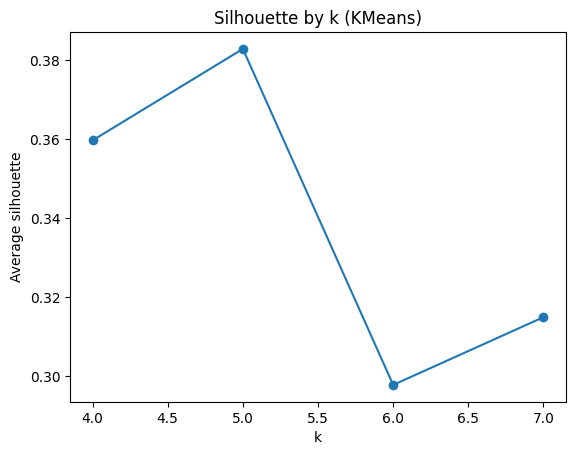

In [37]:
K_RANGE = range(4, 8)  # try 4..8
best = {"k":None, "score":-1, "labels":None}

scores = []
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(Xr)
    # Euclidean on L2-normalized vectors ≈ cosine
    score = silhouette_score(Xr, labels, metric="euclidean")
    scores.append((k, score))
    print(f"k={k} → silhouette={score:.3f}")
    if score > best["score"]:
        best = {"k":k, "score":score, "labels":labels}

print(f"\n✅ Best k: {best['k']} with silhouette={best['score']:.3f}")
labels = best["labels"]

# Plot silhouette vs k
plt.plot([k for k,_ in scores],[s for _,s in scores], marker="o")
plt.title("Silhouette by k (KMeans)")
plt.xlabel("k"); plt.ylabel("Average silhouette")
plt.show()


Attach cluster ids back (no length mismatch)

In [38]:
df_clust["meta_category"] = labels  # only for rows we clustered
# Put -1 for rows we skipped (empty text)
df_fewcolumns["meta_category"] = -1
df_fewcolumns.loc[df_clust.index, "meta_category"] = df_clust["meta_category"]
df_fewcolumns["meta_category"] = df_fewcolumns["meta_category"].astype(int)

df_fewcolumns["meta_category"].value_counts().sort_index()


/tmp/ipython-input-3839656278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns["meta_category"] = -1
/tmp/ipython-input-3839656278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns["meta_category"] = df_fewcolumns["meta_category"].astype(int)


,count
meta_category,
0,631
1,6677
2,4347
3,4606
4,12071


Inspect clusters (sizes, top examples, top terms)

In [39]:
# Sizes
display(
    df_fewcolumns.groupby("meta_category")
      .agg(n_items=("id","count"),
           avg_rating=("reviews.rating","mean"))
      .sort_values("n_items", ascending=False)
      .round(2)
)

# Friendly display name for peeking
def first_nonempty(row, cols):
    for c in cols:
        if c in row and pd.notna(row[c]) and str(row[c]).strip():
            return str(row[c]).strip()
    return "Unknown"
fallbacks = ["name","reviews.title","asins","brand","categories"]
df_fewcolumns["display_name"] = df_fewcolumns.apply(lambda r: first_nonempty(r, fallbacks), axis=1)

def peek_cluster(cid, k=10):
    cols = ["display_name","name","brand","categories","reviews.title"]
    cols = [c for c in cols if c in df_fewcolumns.columns]
    return df_fewcolumns.loc[df_fewcolumns["meta_category"]==cid, cols].head(k)

for cid in sorted(df_fewcolumns["meta_category"].unique()):
    print(f"\n=== Cluster {cid} ===")
    display(peek_cluster(cid, k=8))


,n_items,avg_rating
meta_category,,
4,12071,4.45
1,6677,4.57
3,4606,4.54
2,4347,4.58
0,631,4.54



=== Cluster 0 ===


/tmp/ipython-input-2006485772.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns["display_name"] = df_fewcolumns.apply(lambda r: first_nonempty(r, fallbacks), axis=1)


,display_name,name,brand,categories,reviews.title
8347,Amazon Echo ‚Äì White,Amazon Echo ‚Äì White,Amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Arrived as described.
8348,Amazon Echo ‚Äì White,Amazon Echo ‚Äì White,Amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Much better sound sound than 2nd generation
8349,Amazon Echo Show - Black,Amazon Echo Show - Black,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...",Great addition to a living room
8350,Echo Spot Pair Kit (Black),Echo Spot Pair Kit (Black),Amazon,"Amazon Echo,Networking,Home & Tools,Smart Home...",ALEXA ENABLED DEVICE WITH SCREEN.
8351,Echo Spot Pair Kit (Black),Echo Spot Pair Kit (Black),Amazon,"Amazon Echo,Networking,Home & Tools,Smart Home...",Gotta have this one!!
12221,Amazon Echo (1st Generationcertified) Color:Wh...,Amazon Echo (1st Generationcertified) Color:Wh...,Amazon,"Amazon Echo,See more Amazon Echo (1st Generati...",Affordable personal assistant
12222,Amazon Echo (1st Generationcertified) Color:Wh...,Amazon Echo (1st Generationcertified) Color:Wh...,Amazon,"Amazon Echo,See more Amazon Echo (1st Generati...","Alexa, tell me a joke!"
12223,Amazon Echo (1st Generationcertified) Color:Wh...,Amazon Echo (1st Generationcertified) Color:Wh...,Amazon,"Amazon Echo,See more Amazon Echo (1st Generati...","Alexa, tell me a joke!"



=== Cluster 1 ===


,display_name,name,brand,categories,reviews.title
8343,AmazonBasics Nylon CD/DVD Binder (400 Capacity),AmazonBasics Nylon CD/DVD Binder (400 Capacity),Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Excellent product
8344,AmazonBasics Nylon CD/DVD Binder (400 Capacity),AmazonBasics Nylon CD/DVD Binder (400 Capacity),Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",It was a much needed storage
8345,AmazonBasics Nylon CD/DVD Binder (400 Capacity),AmazonBasics Nylon CD/DVD Binder (400 Capacity),Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",it was worth it
8346,AmazonBasics Nylon CD/DVD Binder (400 Capacity),AmazonBasics Nylon CD/DVD Binder (400 Capacity),Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...","Not well designed, very tight when full. Becom..."
8352,Fire TV Stick Streaming Media Player Pair Kit,Fire TV Stick Streaming Media Player Pair Kit,Amazon,"Electronics,TVs Entertainment,Featured Brands,...",Fire stick
8353,Fire TV Stick Streaming Media Player Pair Kit,Fire TV Stick Streaming Media Player Pair Kit,Amazon,"Electronics,TVs Entertainment,Featured Brands,...",Great product
8354,Fire TV Stick Streaming Media Player Pair Kit,Fire TV Stick Streaming Media Player Pair Kit,Amazon,"Electronics,TVs Entertainment,Featured Brands,...",GREAT! PRICES
8355,Fire TV Stick Streaming Media Player Pair Kit,Fire TV Stick Streaming Media Player Pair Kit,Amazon,"Electronics,TVs Entertainment,Featured Brands,...","Quick, Simple, Easy to use and SAVE YOU MONEY!"



=== Cluster 2 ===


,display_name,name,brand,categories,reviews.title
19402,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...","All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",A budget
19404,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...","All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",A Good Price and Great Value
19405,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...","All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",a good product
19406,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...","All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",A great tablet at a fraction of the cost of a ...
19407,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...","All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",A great tablet for beginners and Amazon fans
19408,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...","All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",A great tablet for my daughter.
19409,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...","All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",A Keeper
19410,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...","All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",A lot of entertainment for the money



=== Cluster 3 ===


,display_name,name,brand,categories,reviews.title
13387,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...",2 year old loves it
13389,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...",2yr old approved
13390,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...",3 year old granddaughter loves it!!! Easy for her
13391,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...",3 year old's Heaven
13396,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...",9 year old loves
13408,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...",A Great first tablet
13410,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...",A great little computer
13413,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...",A great table for kids



=== Cluster 4 ===


,display_name,name,brand,categories,reviews.title
0,AmazonBasics AAA Performance Alkaline Batterie...,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",... 3 of them and one of the item is bad quali...
1,AmazonBasics AAA Performance Alkaline Batterie...,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",... always the less expensive way to go for pr...
2,AmazonBasics AAA Performance Alkaline Batterie...,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",... are not Duracell but for the price i am ha...
3,AmazonBasics AAA Performance Alkaline Batterie...,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",... as well as name brand batteries at a much ...
4,AmazonBasics AAA Performance Alkaline Batterie...,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",... batteries are very long lasting the price ...
5,AmazonBasics AAA Performance Alkaline Batterie...,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",... batteries for Christmas and the AmazonBasi...
6,AmazonBasics AAA Performance Alkaline Batterie...,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",... batteries have ordered them in the past be...
7,AmazonBasics AAA Performance Alkaline Batterie...,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",... batteries that last quite a while then the...


Top TF-IDF terms per cluster (helps naming):

In [40]:
# Use the same TF-IDF (X) we built earlier; focus on clustered subset indices
from numpy import argsort

vocab = np.array(tfidf.get_feature_names_out())
labs_all = df_fewcolumns.loc[df_clust.index, "meta_category"].values  # aligned with X rows

def top_terms(cid, topn=15):
    idx = np.where(labs_all==cid)[0]
    if len(idx)==0: return []
    mean_vec = X[idx].mean(axis=0).A1
    return vocab[argsort(-mean_vec)[:topn]].tolist()

for cid in sorted(df_fewcolumns["meta_category"].unique()):
    if cid == -1:
        continue
    print(f"\nCluster {cid} top terms:")
    print(", ".join(top_terms(cid)))



Cluster 0 top terms:
home, smart, speakers, audio, bluetooth, smart home, hubs, bluetooth speakers, portable, mobile, electronics portable, mp3, wireless, smart speakers, tap

Cluster 1 top terms:
tablets, amazon, tablets computers, fire, readers, computers, computers tablets, all, hd, ebook, ebook readers, networking, tablets networking, tablets ebook, includes special

Cluster 2 top terms:
tablets, with, amazon, hd, fire, tablet, with special, tablet with, with alexa, alexa, display 16, alexa hd, offers amazon, all, hd tablet

Cluster 3 top terms:
tablets, kids, toys, fire, amazon, kid, edition, kids edition, edition tablet, proof, kid proof, case, proof case, case amazon, fire kids

Cluster 4 top terms:
batteries, health, household, care, health household, camera, amazonbasics, aaa, aa, amazonbasics aa, and, performance, alkaline, alkaline batteries, performance alkaline


Quick 2D viz (PCA on reduced Xr)

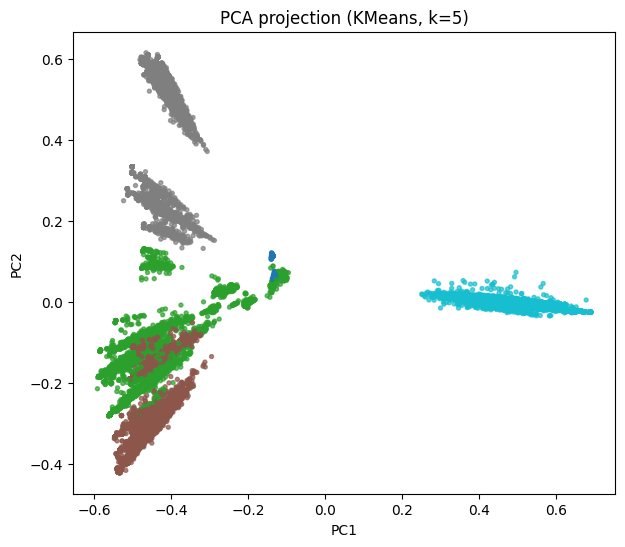

In [41]:
from sklearn.decomposition import PCA
coords = PCA(n_components=2, random_state=42).fit_transform(Xr)

plt.figure(figsize=(7,6))
plt.scatter(coords[:,0], coords[:,1], c=labels, cmap="tab10", s=8, alpha=0.7)
plt.title(f"PCA projection (KMeans, k={best['k']})")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


Name clusters & save

In [42]:
cluster_labels = {
    0: "Smart Speakers & Portable Audio",
    1: "Tablets & E-Readers (General/Adult)",
    2: "Fire Tablets (Alexa / Special Offers)",
    3: "Kids Tablets & Protective Cases",
    4: "Batteries & Household Power (AmazonBasics)",
}
df_fewcolumns["meta_category_label"] = df_fewcolumns["meta_category"].map(cluster_labels)

df_fewcolumns.to_csv("clustered_reviews_kmeans_tfidf.csv", index=False)
print("✅ Saved → clustered_reviews_kmeans_tfidf.csv")


/tmp/ipython-input-1795918031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns["meta_category_label"] = df_fewcolumns["meta_category"].map(cluster_labels)


✅ Saved → clustered_reviews_kmeans_tfidf.csv


Saving the Model

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from joblib import dump

# Example pipeline you already fitted:
pipe_kmeans = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=80000, ngram_range=(1,2), min_df=3)),
    ("svd", TruncatedSVD(n_components=200, random_state=42)),  # remove this step if you didn’t use SVD
    ("kmeans", KMeans(n_clusters=best['k'], random_state=42, n_init=20)),
])

pipe_kmeans.fit(df_clust["cluster_text"])  # your training texts

# Save the whole pipeline
dump(pipe_kmeans, "kmeans_text_pipeline.joblib")

# (Optional) save training outputs/metadata
df_fewcolumns["meta_category"] = pipe_kmeans.predict(df_fewcolumns["cluster_text"])
df_fewcolumns.to_csv("clustered_reviews_kmeans.csv", index=False)

# (Optional) persist labels mapping you created
cluster_labels = {
    0: "Smart Speakers & Portable Audio",
    1: "Tablets & E-Readers (General/Adult)",
    2: "Fire Tablets (Alexa / Special Offers)",
    3: "Kids Tablets & Protective Cases",
    4: "Batteries & Household Power (AmazonBasics)",
}
df_fewcolumns["meta_category_label"] = df_fewcolumns["meta_category"].map(cluster_labels)

import json, pathlib
pathlib.Path("artifacts").mkdir(exist_ok=True)
with open("artifacts/cluster_labels.json", "w") as f:
    json.dump(cluster_labels, f)

/tmp/ipython-input-1195948945.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns["meta_category"] = pipe_kmeans.predict(df_fewcolumns["cluster_text"])
/tmp/ipython-input-1195948945.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns["meta_category_label"] = df_fewcolumns["meta_category"].map(cluster_labels)


Load later and use

In [22]:
from joblib import load
import json

pipe_kmeans = load("kmeans_text_pipeline.joblib")

# Predict cluster IDs for new/raw texts (same field you used for training)
new_labels = pipe_kmeans.predict(df_fewcolumns["cluster_text"])

# (Optional) map IDs to names
with open("artifacts/cluster_labels.json") as f:
    cluster_labels = json.load(f)
df_fewcolumns["meta_category"] = new_labels
df_fewcolumns["meta_category_label"] = df_fewcolumns["meta_category"].map(cluster_labels)

/tmp/ipython-input-3533527718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns["meta_category"] = new_labels
/tmp/ipython-input-3533527718.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fewcolumns["meta_category_label"] = df_fewcolumns["meta_category"].map(cluster_labels)
